# **Problem Statement**
Measles is a highly contagious disease. Although an effective vaccine exists, outbreaks continue to occur in many countries. The World Health Organization dataset from 06-24-2025 compiles measles case data from different countries and regions. By analyzing temporal trends and geographical differences in measles cases, we can gain a clearer understanding of how the disease is distributed worldwide and provide a foundation for public health research.

# **Data Preference**
Dataset Link: [World Health Organization](https://immunizationdata.who.int/global?topic=Provisional-measles-and-rubella-data&lo%20cation=)

CSV File: [Global Measles Data](https://www.bing.com/ck/a?!&&p=da4b01556def30dc993d4c98509f3050a7a3c0d6292f5ac00dcd3373a6f5e725JmltdHM9MTc1NzM3NjAwMA&ptn=3&ver=2&hsh=4&fclid=055f8d0f-0193-6020-1937-9efe00086119&psq=404-table-web-epi-curve-data.xlsx&u=a1aHR0cHM6Ly9pbW11bml6YXRpb25kYXRhLndoby5pbnQvZG9jcy9saWJyYXJpZXNwcm92aWRlcjIxL21lYXNsZXMtYW5kLXJ1YmVsbGEvNDA0LXRhYmxlLXdlYi1lcGktY3VydmUtZGF0YS54bHN4P3NmdnJzbj01OTIyZWJmN182)

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import re
import warnings
warnings.filterwarnings('ignore')


# **Dataset Documentation**
1. Country: Country or region name
2. Year / Month: Time of observation
3. measles_suspect: Suspected measles cases: A suspected case is one in which a
patient with fever and maculopapular (non-vesicular) rash, or in whom a health-
care worker suspects measles
4. measles_clinical: Clinically compatible measles cases: A suspected case with
fever and maculopapular (non-vesicular) rash and at least one of cough, coryza or
conjunctivitis, but no adequate clinical specimen was taken and the case has not
been linked epidemiologically to a laboratory-confirmed case of measles or other
communicable disease
5. measles_lab_confirmed: Laboratory-confirmed measles cases: A suspected case
of measles that has been confirmed positive by testing in a proficient laboratory,
and vaccine-associated illness has been ruled out
6. measles_total: Total measles cases: The sum of clinically compatible,
epidemiologically linked and laboratory-confirmed cases
7. Data has 23000+ records and 7 attributes.

In [ ]:
# data from Google Sheets
#url = "https://docs.google.com/spreadsheets/d/1NDwpwpJ2arnsmbZdwJIIxIUnt4rxd8px257JhOSXc7c/export?format=csv" #test data
url = "https://docs.google.com/spreadsheets/d/1wgIfOVS2V96_0Jwb6dePuxShpB43FltdLK3k0miyRhE/export?format=csv"

# data is stored in pandas as a DataFrame
df = pd.read_csv(url)
# the top of the data frame is the "head"
df.head()

,Region,Country,ISO3,Year,Month,report_date,Measles \nsuspect,Measles \nclinical,Measles \nepi-linked,Measles \nlab-confirmed,...,Cases_per_100k,Rubella \nclinical,Rubella \nepi-linked,Rubella \nlab-confirmed,Rubella\nTotal,Discarded,Measles Rolling Mean\n(3 Months),Rubella \nRolling \nMean\n(3 Months),Average Rolling Mean,Season
0,Afr,Algeria,Dza,2012,1,01/2012,8.0,6.0,0.0,2.0,...,25000.0,NaN,NaN,NaN,NaN,0.0,12.5,0.0,6.25,Winter
1,Afr,Algeria,Dza,2012,2,02/2012,10.0,10.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,7.5,0.5,4,Winter
2,Afr,Algeria,Dza,2012,3,03/2012,17.0,17.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,14,1.5,7.75,Spring
3,Afr,Algeria,Dza,2012,4,04/2012,7.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,2.0,2.5,4.5,3.5,Spring
4,Afr,Algeria,Dza,2012,5,05/2012,14.0,11.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.0,3.0,5.5,1.5,3.5,Spring


# VISUALIZATION 1: Rolling Means Over Time
This visualization displays 3 month rolling average of both rubella and measles with respect to time.


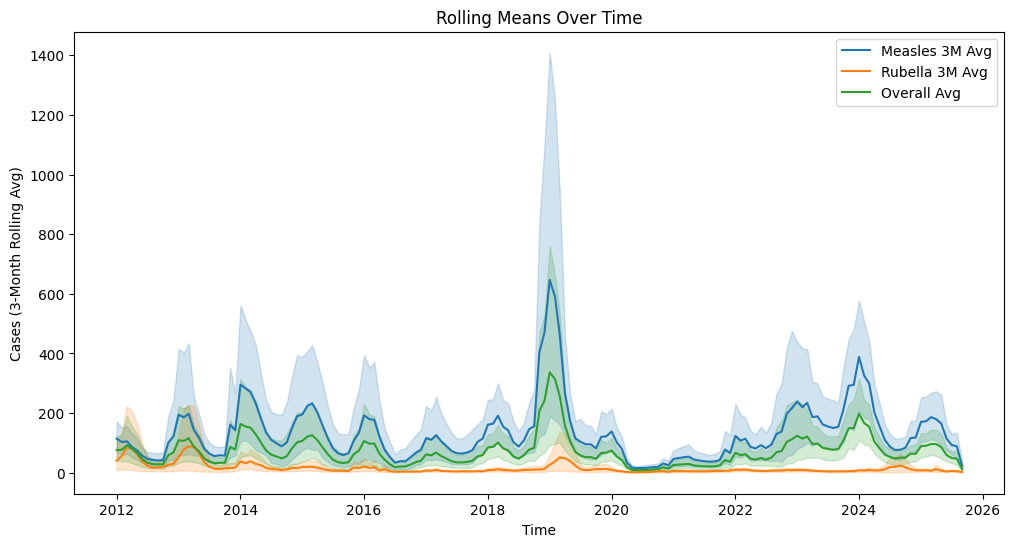

In [ ]:
# Clean column names
df = df.rename(columns={
    "Measles Rolling Mean\n(3 Months)": "Measles_Rolling_Mean",
    "Rubella \nRolling \nMean\n(3 Months)": "Rubella_Rolling_Mean",
    "Average Rolling Mean": "Average_Rolling_Mean",
    "Season": "Season"
})

# Ensure numeric
for col in ["Measles_Rolling_Mean", "Rubella_Rolling_Mean", "Average_Rolling_Mean"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 1. Line plot (comparison over time)
df["time"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str), errors="coerce")
plt.figure(figsize=(12,6))
sns.lineplot(x="time", y="Measles_Rolling_Mean", data=df, label="Measles 3M Avg")
sns.lineplot(x="time", y="Rubella_Rolling_Mean", data=df, label="Rubella 3M Avg")
sns.lineplot(x="time", y="Average_Rolling_Mean", data=df, label="Overall Avg")
plt.title("Rolling Means Over Time")
plt.xlabel("Time")
plt.ylabel("Cases (3-Month Rolling Avg)")
plt.legend()
plt.show()

# VISUALIZATION 2: Seasonal Average Rolling Means: Measles vs Rubella
As we created extra variable containing seasons we plot it against the average rolling mean so that we can see in which seasons we had more number of cases.

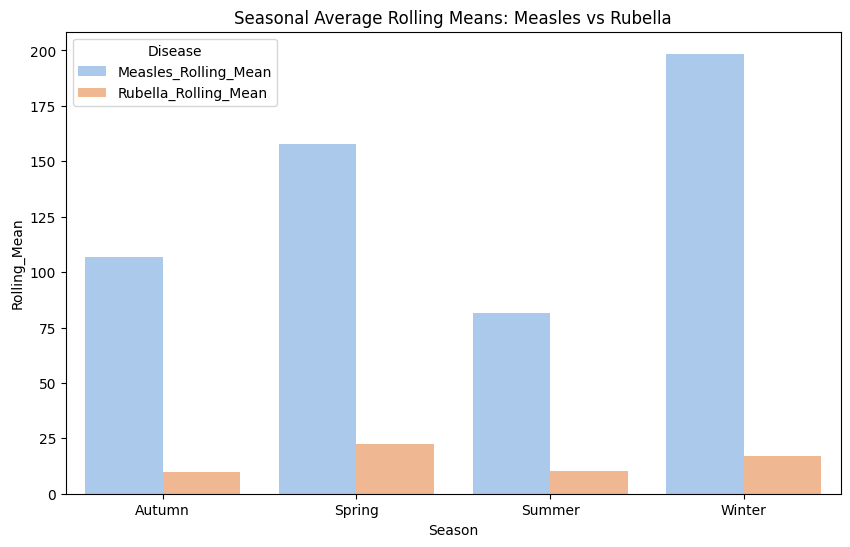

In [ ]:
# Grouped Barplot: Seasonal averages of Measles vs Rubella
plt.figure(figsize=(10,6))
seasonal_means = df.groupby("Season")[["Measles_Rolling_Mean", "Rubella_Rolling_Mean"]].mean().reset_index()
seasonal_means = pd.melt(seasonal_means, id_vars="Season", var_name="Disease", value_name="Rolling_Mean")

sns.barplot(x="Season", y="Rolling_Mean", hue="Disease", data=seasonal_means, palette="pastel")
plt.title("Seasonal Average Rolling Means: Measles vs Rubella")
plt.show()



# VISUALIZATION 3: Measles & Rubella Cases with Anomalies (Above 2x Rolling Mean)
By ploting time versus measles total we can get measles and rubella cases with anomalies.

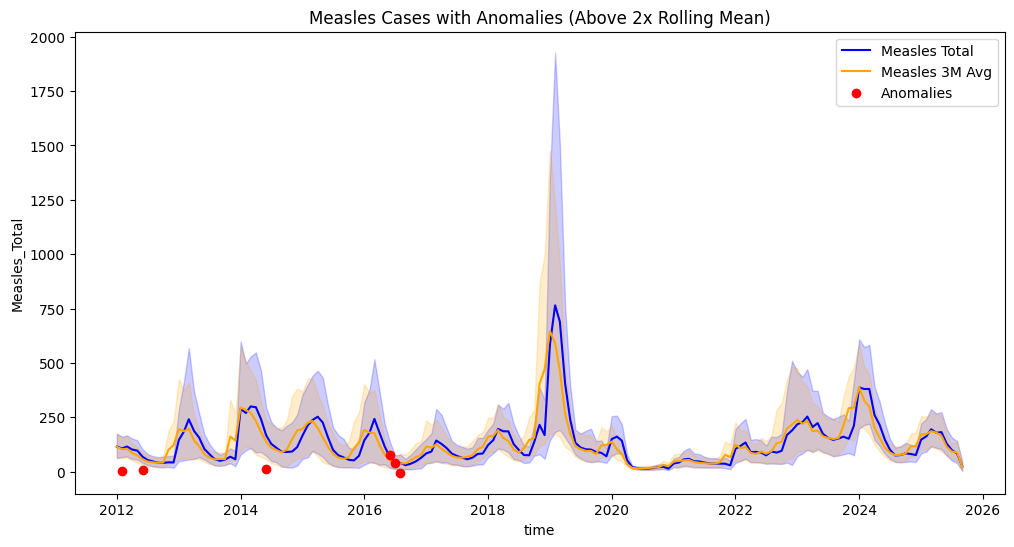

In [ ]:


# Clean column names
df = df.rename(columns={
    "Measles Rolling Mean\n(3 Months)": "Measles_Rolling_Mean",
    "Rubella \nRolling \nMean\n(3 Months)": "Rubella_Rolling_Mean",
    "Average Rolling Mean": "Average_Rolling_Mean",
    "Season": "Season",
    "Measles \ntotal": "Measles_Total",
    "Rubella\nTotal": "Rubella_Total"
})

# Ensure numeric
for col in ["Measles_Rolling_Mean", "Rubella_Rolling_Mean", "Average_Rolling_Mean",
            "Measles_Total", "Rubella_Total"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Time column
df["time"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str), errors="coerce")

# === ANOMALY DETECTION VISUALIZATIONS ===

# 1. Lineplot with anomaly points highlighted (Measles vs Rolling Mean)
plt.figure(figsize=(12,6))
sns.lineplot(x="time", y="Measles_Total", data=df, label="Measles Total", color="blue")
sns.lineplot(x="time", y="Measles_Rolling_Mean", data=df, label="Measles 3M Avg", color="orange")
anomalies = df[df["Measles_Total"] > df["Measles_Rolling_Mean"]*2]
plt.scatter(anomalies["time"], anomalies["Measles_Total"], color="red", label="Anomalies", zorder=5)
plt.title("Measles Cases with Anomalies (Above 2x Rolling Mean)")
plt.legend()
plt.show()



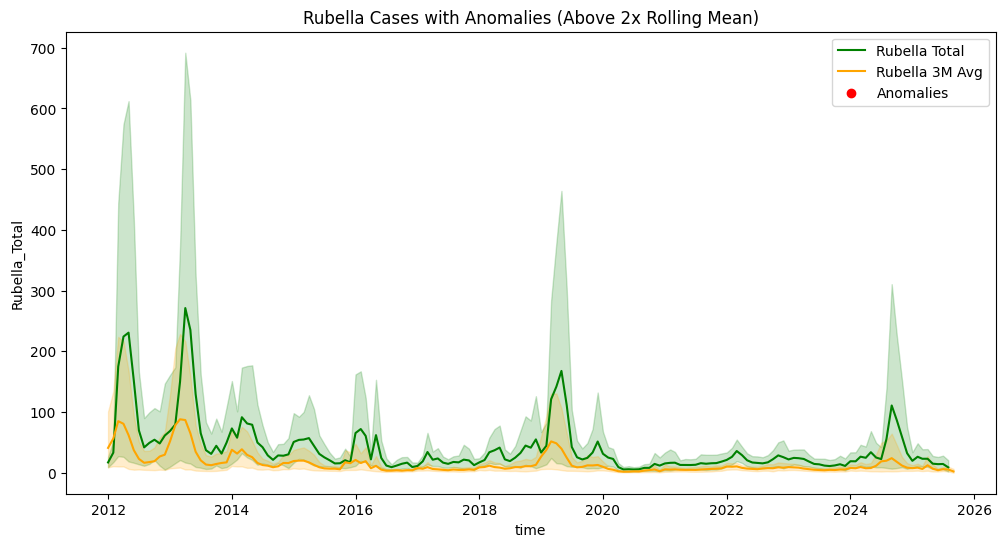

In [ ]:
# 2. Rubella anomalies with rolling mean comparison
plt.figure(figsize=(12,6))
sns.lineplot(x="time", y="Rubella_Total", data=df, label="Rubella Total", color="green")
sns.lineplot(x="time", y="Rubella_Rolling_Mean", data=df, label="Rubella 3M Avg", color="orange")
anomalies_r = df[df["Rubella_Total"] > df["Rubella_Rolling_Mean"]*2]
plt.scatter(anomalies_r["time"], anomalies_r["Rubella_Total"], color="red", label="Anomalies", zorder=5)
plt.title("Rubella Cases with Anomalies (Above 2x Rolling Mean)")
plt.legend()
plt.show()



# VISUALIZATION 4: Correlation Heatmap of Key Metrics (Helps Spot Cross-Disease Anomalies)
Overall heatmap of new features which we calculated using EDA to gain insights how they are co reallated with each other

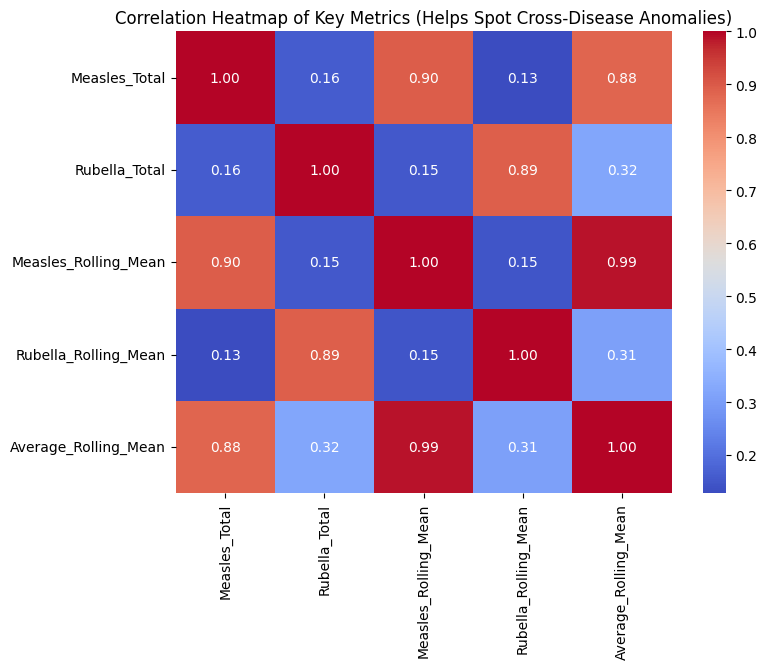

In [ ]:

# 6. Heatmap of anomalies across metrics
df_anomaly = df[["Measles_Total", "Rubella_Total", "Measles_Rolling_Mean", "Rubella_Rolling_Mean", "Average_Rolling_Mean"]]
corr = df_anomaly.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Metrics (Helps Spot Cross-Disease Anomalies)")
plt.show()


# Visualization 5: Stacked Area Chart — Contribution of Measles vs. Rubella to the Total

Purpose: Show the relative contribution of Measles total and Rubella Total to the overall number of cases over time, using a stacked area chart.

In [ ]:
# -----------------------
# Normalize column names
# -----------------------
def normalize(name: str) -> str:
    name = re.sub(r'\s+', '_', name.strip())
    name = re.sub(r'[^\w_]', '', name)
    return name

df.columns = [normalize(c) for c in df.columns]

# -----------------------
# Identify needed columns
# -----------------------
DATE_COL = "Year"  # we'll build a datetime below
MEASLES_TOTAL = [c for c in df.columns if "measles_total" in c.lower()][0]
RUBELLA_TOTAL = [c for c in df.columns if "rubella_total" in c.lower()][0]

# -----------------------
# Create proper datetime (Year-Month)
# -----------------------
if "Month" in df.columns:
    df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str), errors="coerce")
else:
    df["Date"] = pd.to_datetime(df["Year"], format="%Y", errors="coerce")

# -----------------------
# Contribution of Measles
# -----------------------
fig_measles = px.area(
    df,
    x="Date", y=MEASLES_TOTAL,
    labels={"Date": "Date", MEASLES_TOTAL: "Cases"},
    title="Contribution of Measles"
)
fig_measles.update_layout(legend_title_text="")
fig_measles.show()

# -----------------------
# Contribution of Rubella
# -----------------------
fig_rubella = px.area(
    df,
    x="Date", y=RUBELLA_TOTAL,
    labels={"Date": "Date", RUBELLA_TOTAL: "Cases"},
    title="Contribution of Rubella"
)
fig_rubella.update_layout(legend_title_text="")
fig_rubella.show()
